# **Which lifestyle patterns have the strongest impact on health?**



## **1. Data Acquisition** 

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [39]:
csv_file = "../data/Wellbeing_and_lifestyle_data_Kaggle.csv"
csv_data = pd.read_csv(csv_file)

# Display the first few rows of the dataframe to understand its structure
csv_data.head()


,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9


## **Data Preparation/Data Cleaning** 


### **Filtering the dataset**

In [40]:
csv_data = pd.read_csv(csv_file)  # Replace with your actual file name

# List of columns to keep
columns_to_keep = [
    "Timestamp",
    "FRUITS_VEGGIES",
    "DAILY_STRESS",
    "PLACES_VISITED",
    "CORE_CIRCLE",
    "BMI_RANGE",
    "DAILY_STEPS",
    "SLEEP_HOURS",
    "SUFFICIENT_INCOME",
    "TIME_FOR_PASSION",
    "WEEKLY_MEDITATION",
    "AGE",
    "GENDER",
]

filtered_csv_data = csv_data[columns_to_keep]

# Save to new CSV (Only one time)
#filtered_csv_data.to_csv("../data/Filtered_Wellbeing_and_lifestyle_data_Kaggle.csv", index=False)
#csv_data=filtered_csv_data


### **Missing Values:** 

In [41]:
print("\nMissing values check: \n")
missing_val = csv_data.isnull().sum()
if missing_val.sum()== 0:
    print("no missing values found")
else:
    print("name of the column and the number of values missing:")
    print(missing_val[missing_val>0])


Missing values check: 

no missing values found


### **Different Format:**
 

In [42]:

print("\nData formatting check per column: ")
issue=False
for column in csv_data.columns:
        if csv_data[column].apply(type).nunique()>1:
            print(f"Mixed data types in column '{column}'")
            issue = True
            
if not issue:
        print("no issues with formatting")


Data formatting check per column: 
no issues with formatting


### **Check: Case sensitive**
**Note:** There are no case sensitive errors in the whole dataset.


#### Check Unique values & data types

In [43]:
print(csv_data["GENDER"].unique())

valid_values = ["Male", "Female"]
invalid_entries = csv_data[~csv_data["GENDER"].isin(valid_values)]
print("Case-sensitive invalid entries:")
print(invalid_entries["GENDER"].head())

print(filtered_csv_data[columns_to_keep].dtypes)

['Female' 'Male']
Case-sensitive invalid entries:
Series([], Name: GENDER, dtype: object)


KeyError: 'WORK_LIFE_BALANCE_SCORE'

### **Outliers:**
**Note:** The IQR factor is set as a factor of 1.5


Outliers in 'FRUITS_VEGGIES':
Empty DataFrame
Columns: [FRUITS_VEGGIES]
Index: []

Outliers in 'PLACES_VISITED':
Empty DataFrame
Columns: [PLACES_VISITED]
Index: []

Outliers in 'CORE_CIRCLE':
Empty DataFrame
Columns: [CORE_CIRCLE]
Index: []

Outliers in 'DAILY_STEPS':
Empty DataFrame
Columns: [DAILY_STEPS]
Index: []

Outliers in 'SLEEP_HOURS':
       SLEEP_HOURS
738              2
1904             1
2572             2
2968             1
2986             1
3007             1
3023             1
3376             1
3436             1
3437             1
3611             2
3785             1
4380             2
4763             1
5712             2
5867             1
6299             1
6751             2
6795             2
8394             2
8924             1
8967             1
9318             2
9338             1
9415             2
9637             2
9929             2
9930             2
9944             2
9987             1
10083            2
10975            2
12955            1
13081 

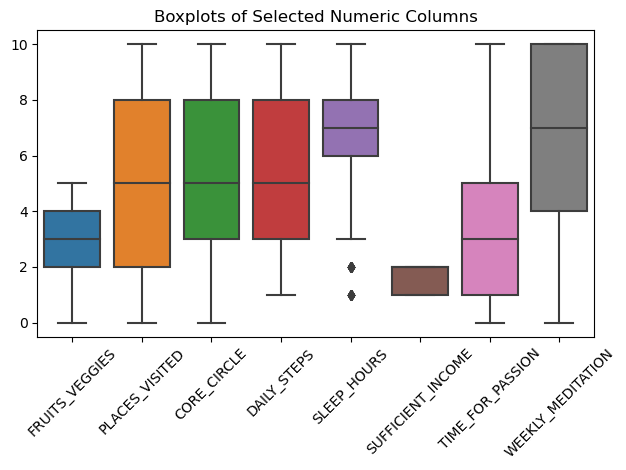

In [44]:

# Columns for outlier detection (only numeric)
columns = [
    "FRUITS_VEGGIES",
    "PLACES_VISITED",
    "CORE_CIRCLE",
    "DAILY_STEPS",
    "SLEEP_HOURS",
    "SUFFICIENT_INCOME",
    "TIME_FOR_PASSION",
    "WEEKLY_MEDITATION",
]

# Make a copy to clean outliers if needed
clean_data = csv_data.copy()

for col in columns:
    Q1 = csv_data[col].quantile(0.25)
    Q3 = csv_data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = csv_data[(filtered_csv_data[col] < lower_bound) | (csv_data[col] > upper_bound)]

    print(f"\nOutliers in '{col}':")
    print(outliers[[col]])

    # Optionally remove outliers
    # clean_data = clean_data[(clean_data[col] >= lower_bound) & (clean_data[col] <= upper_bound)]

# Boxplots for visualizing all columns at once
sns.boxplot(data=csv_data[columns])
plt.title("Boxplots of Selected Numeric Columns")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Explorative Analysis

### Univariate Analysis

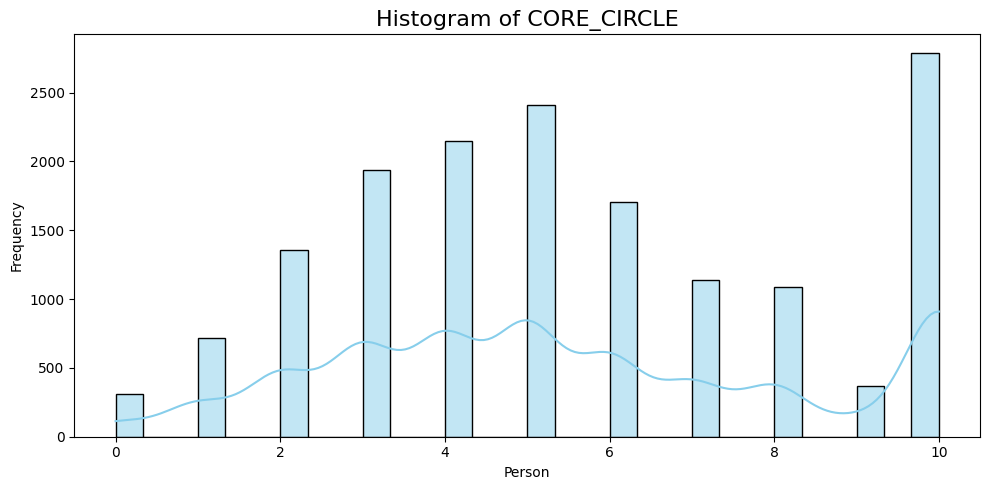

In [45]:
feature = 'CORE_CIRCLE'

plt.figure(figsize=(10, 5))
sns.histplot(csv_data[feature], bins=30, kde=True, color='skyblue')

plt.title(f'Histogram of {feature}', fontsize=16)
plt.xlabel('Person')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

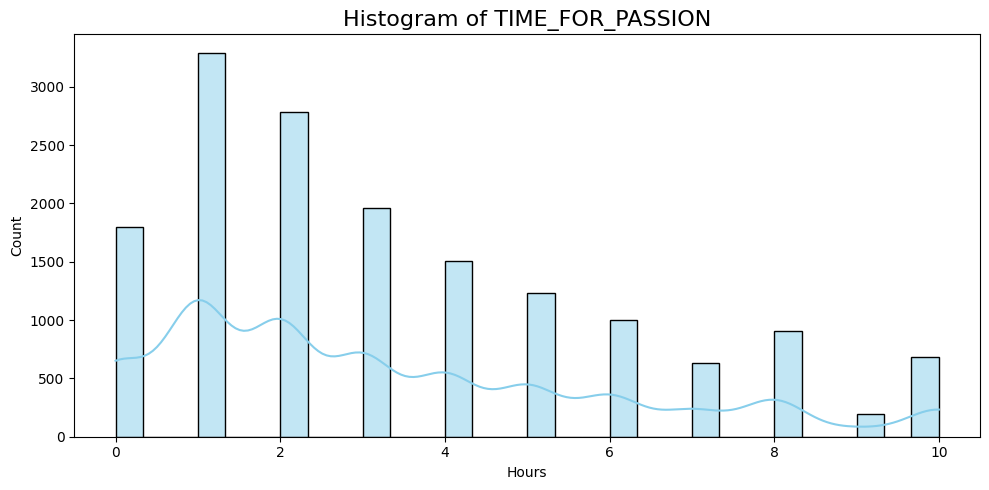

In [46]:
feature = 'TIME_FOR_PASSION'

plt.figure(figsize=(10, 5))
sns.histplot(csv_data[feature], bins=30, kde=True, color='skyblue')

plt.title(f'Histogram of {feature}', fontsize=16)
plt.xlabel('Hours')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

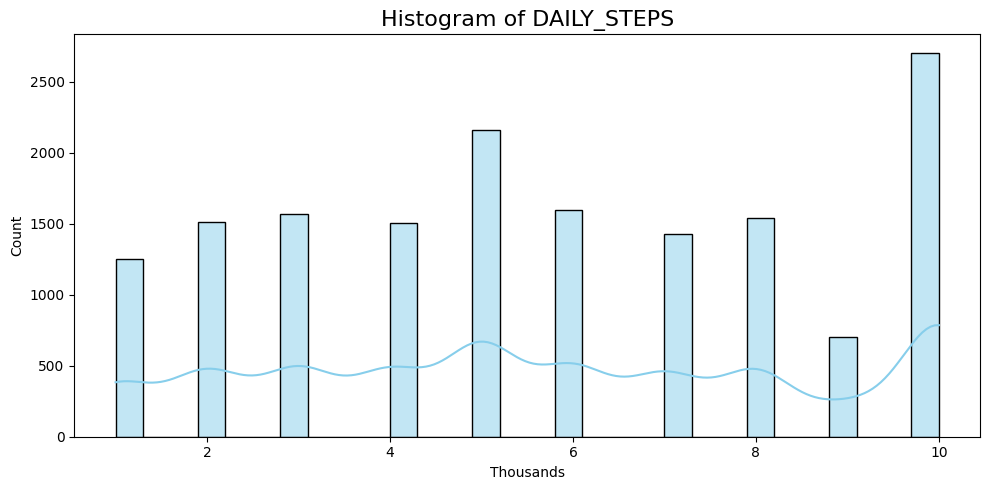

In [47]:
feature = 'DAILY_STEPS'

plt.figure(figsize=(10, 5))
sns.histplot(csv_data[feature], bins=30, kde=True, color='skyblue')

plt.title(f'Histogram of {feature}', fontsize=16)
plt.xlabel('Thousands')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

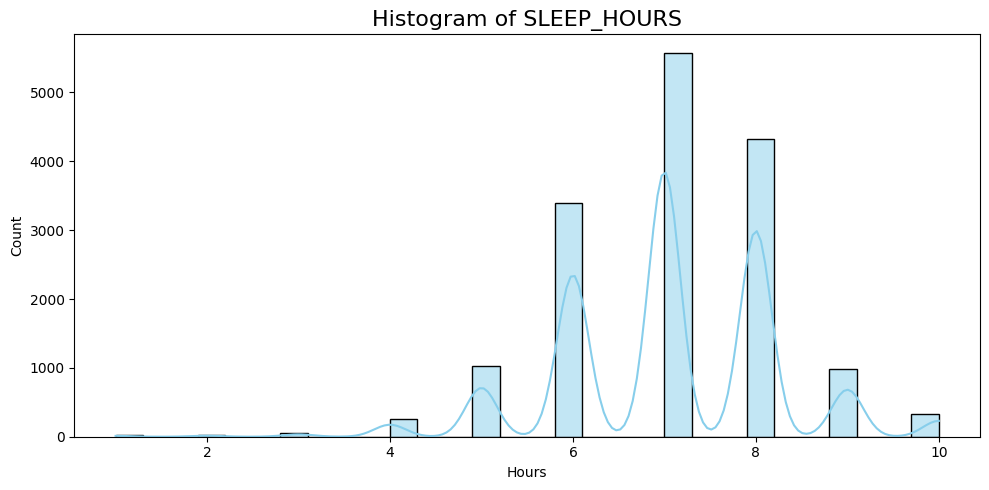

In [48]:
feature = 'SLEEP_HOURS'

plt.figure(figsize=(10, 5))
sns.histplot(csv_data[feature], bins=30, kde=True, color='skyblue')

plt.title(f'Histogram of {feature}', fontsize=16)
plt.xlabel('Hours')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Bivariate Analysis

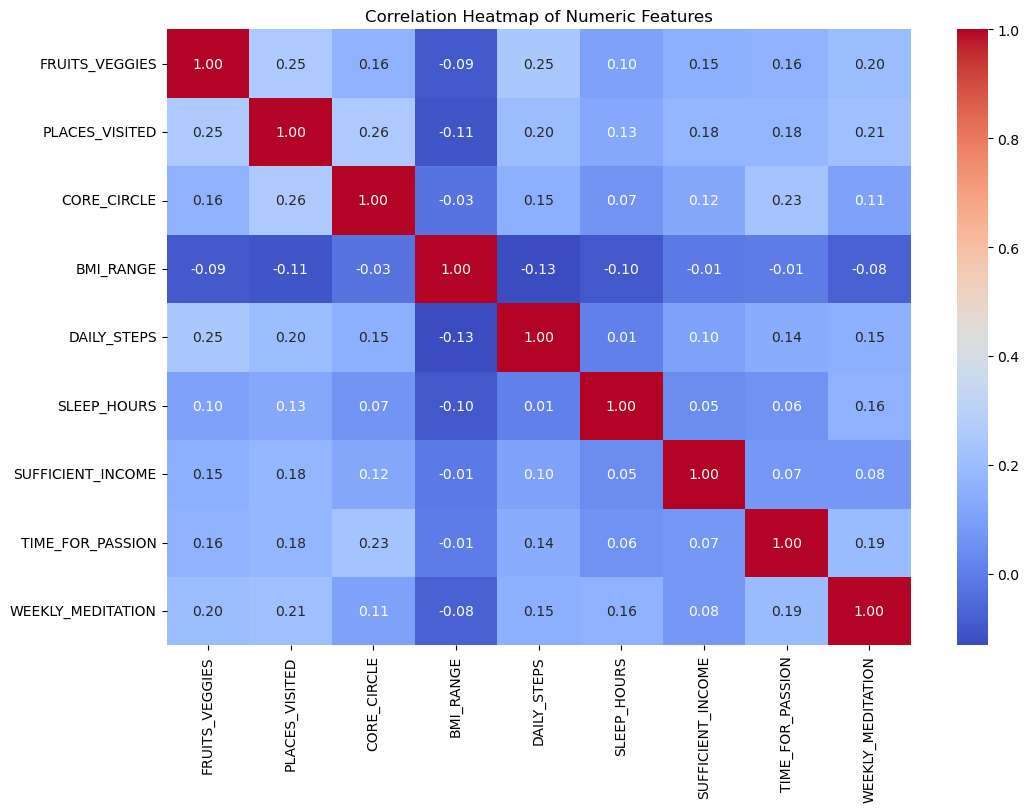

In [49]:
numeric_cols = ['FRUITS_VEGGIES', 'PLACES_VISITED', 'CORE_CIRCLE', 'BMI_RANGE',
                'DAILY_STEPS', 'SLEEP_HOURS', 'SUFFICIENT_INCOME',
                'TIME_FOR_PASSION', 'WEEKLY_MEDITATION']

plt.figure(figsize=(12, 8))
sns.heatmap(csv_data[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

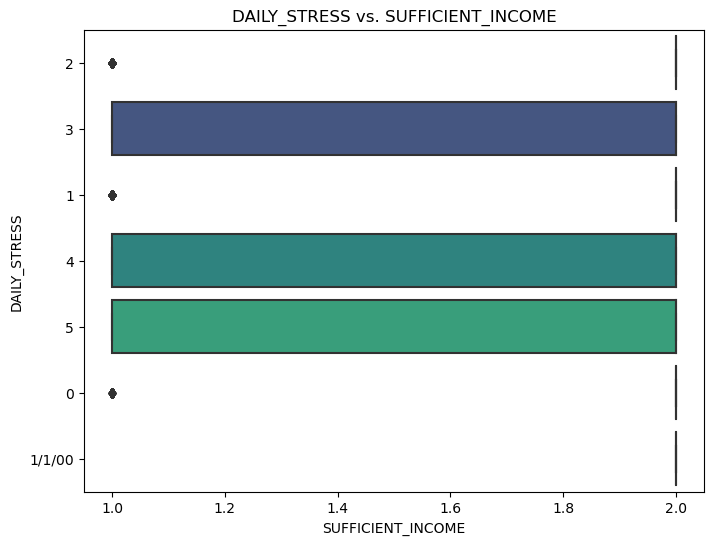

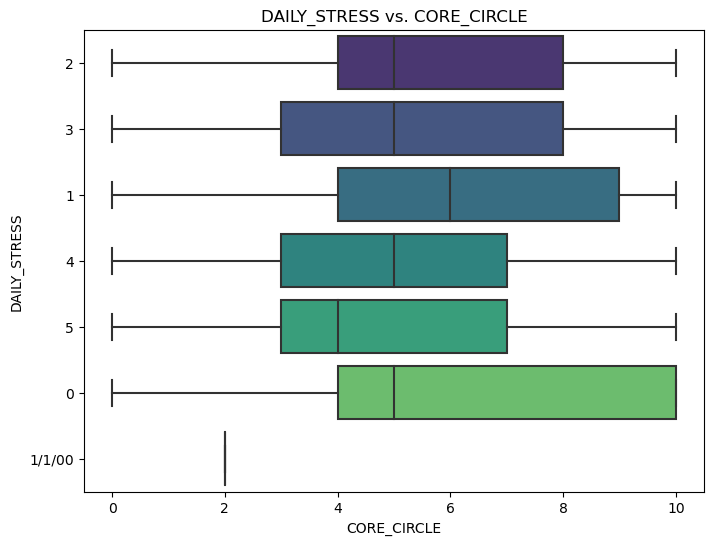

In [50]:
# Box plots: DAILY_STRESS vs. Lifestyle factors
for lifestyle_factor in ['SUFFICIENT_INCOME', 'CORE_CIRCLE']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=csv_data, x=lifestyle_factor, y='DAILY_STRESS', palette='viridis')
    plt.title(f'DAILY_STRESS vs. {lifestyle_factor}')
    plt.xlabel(lifestyle_factor)
    plt.ylabel('DAILY_STRESS')
    plt.show()

### Categorical Data Analysis

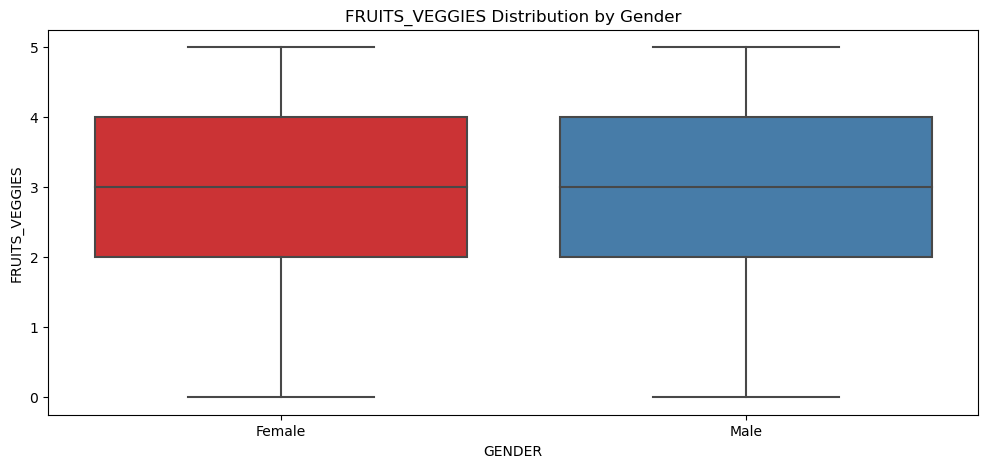

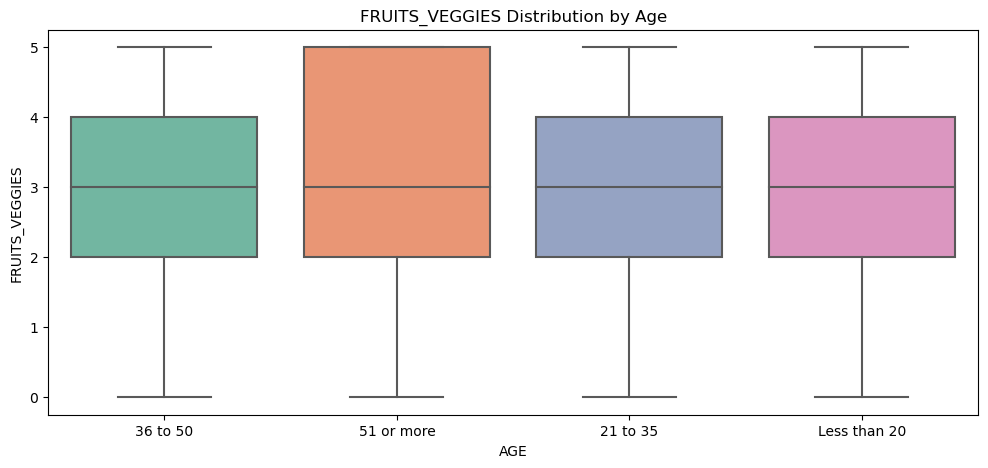

In [51]:
# Box plots for FRUITS_VEGGIES by gender and age
plt.figure(figsize=(12, 5))
sns.boxplot(data=csv_data, x='GENDER', y='FRUITS_VEGGIES', palette='Set1')
plt.title('FRUITS_VEGGIES Distribution by Gender')
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(data=csv_data, x='AGE', y='FRUITS_VEGGIES', palette='Set2')
plt.title('FRUITS_VEGGIES Distribution by Age')
plt.show()


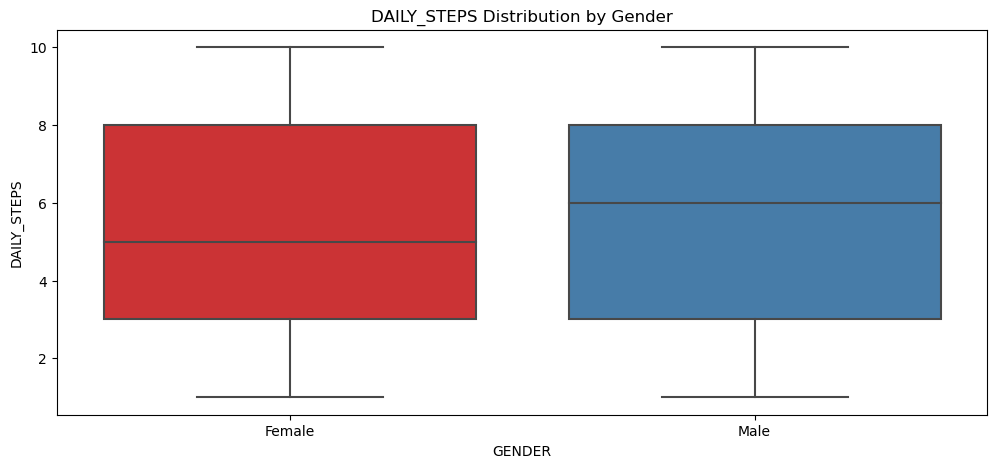

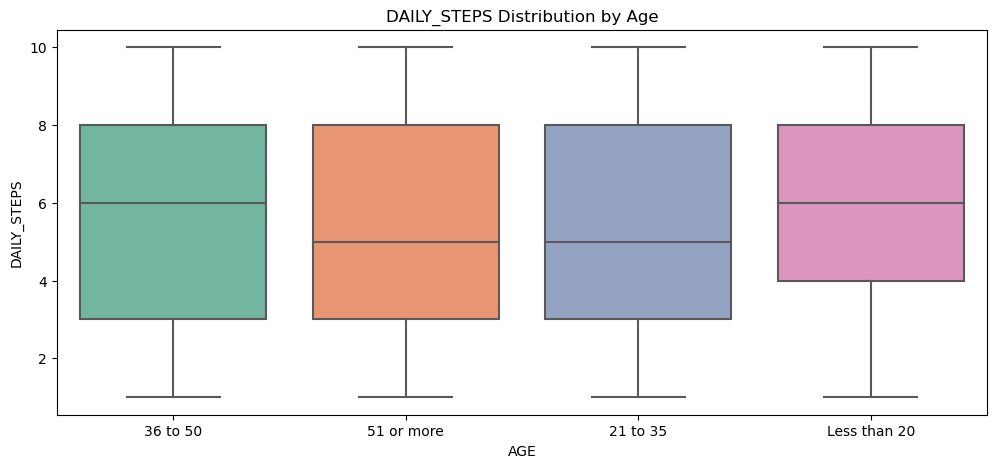

In [52]:
# Box plots for DAILY_STEPS by gender and age
plt.figure(figsize=(12, 5))
sns.boxplot(data=csv_data, x='GENDER', y='DAILY_STEPS', palette='Set1')
plt.title('DAILY_STEPS Distribution by Gender')
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(data=csv_data, x='AGE', y='DAILY_STEPS', palette='Set2')
plt.title('DAILY_STEPS Distribution by Age')
plt.show()

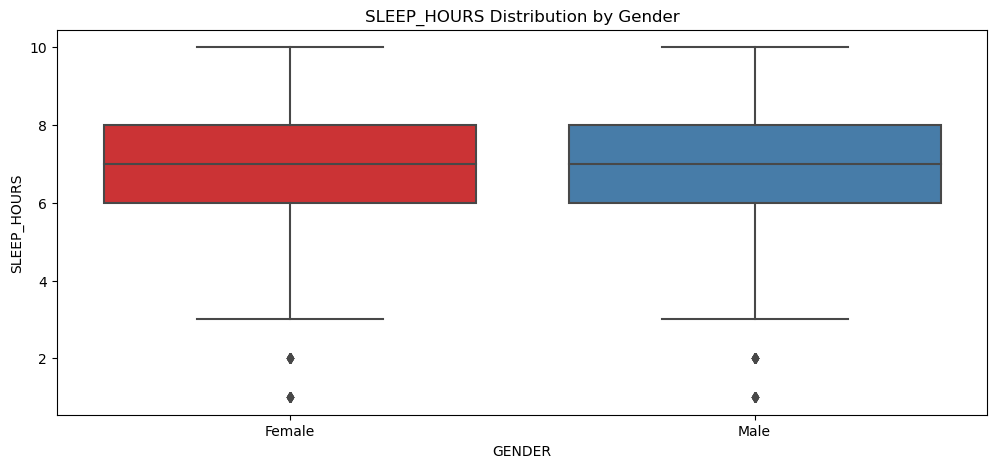

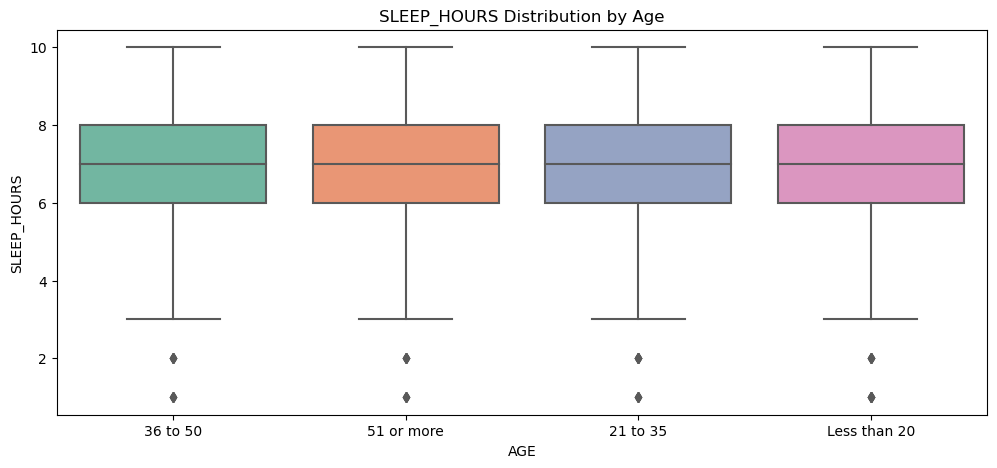

In [53]:
# Box plots for SLEEP_HOURS by gender and age
plt.figure(figsize=(12, 5))
sns.boxplot(data=csv_data, x='GENDER', y='SLEEP_HOURS', palette='Set1')
plt.title('SLEEP_HOURS Distribution by Gender')
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(data=csv_data, x='AGE', y='SLEEP_HOURS', palette='Set2')
plt.title('SLEEP_HOURS Distribution by Age')
plt.show()


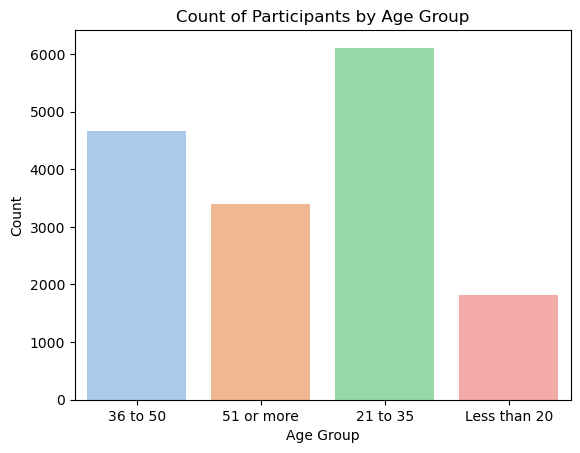

In [54]:
sns.countplot(data=csv_data, x='AGE', palette='pastel')
plt.title('Count of Participants by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


C:\Users\ahadm\AppData\Local\Temp\ipykernel_38256\2624071233.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=csv_data, x='GENDER', palette='muted')


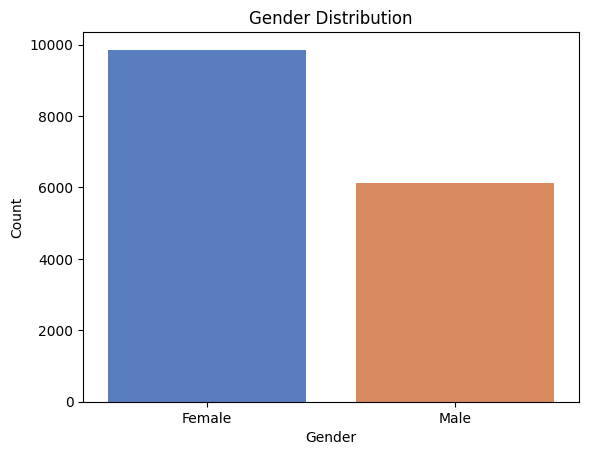

In [55]:

sns.countplot(data=csv_data, x='GENDER', palette='muted')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


### **Feature Engineering** 

#### **Normalization and Feature construction**

In [56]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = [
    "FRUITS_VEGGIES",        # 0–5
    "DAILY_STRESS",          # 0–5
    "PLACES_VISITED",        # 0–10
    "CORE_CIRCLE",           # 0–10
    "BMI_RANGE",             # 1 or 2 (kategorisch)
    "DAILY_STEPS",           # 1–10
    "SLEEP_HOURS",           # 1–10
    "SUFFICIENT_INCOME",     # 1 or 2 (kategorisch)
    "TIME_FOR_PASSION",      # 0–10
    "WEEKLY_MEDITATION"     # 0–10
    #"WORK_LIFE_BALANCE_SCORE"  # 480–820
]


# BMI_SCORE: 1 = healthy, 2 = overweight
csv_data["BMI_SCORE"] = csv_data["BMI_RANGE"].apply(lambda x: 1 if x == 1 else 0)

# INCOME_SCORE: 1= not enough 2 = enough 
csv_data["INCOME_SCORE"] = csv_data["SUFFICIENT_INCOME"].apply(lambda x: 1 if x == 2 else 0)


# columns to normalize without BMI and income
columns_to_scale = [
    "FRUITS_VEGGIES",
    "DAILY_STRESS",
    "PLACES_VISITED",
    "CORE_CIRCLE",
    "DAILY_STEPS",
    "SLEEP_HOURS",
    "TIME_FOR_PASSION",
    "WEEKLY_MEDITATION"
    #"WORK_LIFE_BALANCE_SCORE"
]

#Normalization
numeric_df = csv_data[columns_to_scale].apply(pd.to_numeric, errors="coerce")
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(numeric_df)
scaled_df = pd.DataFrame(scaled_values, columns=columns_to_scale)

# inverting stress(less stress = better)
scaled_df["DAILY_STRESS"] = 1 - scaled_df["DAILY_STRESS"]

# add BMI and income to scaled_df
scaled_df["BMI_SCORE"] = csv_data["BMI_SCORE"]
scaled_df["INCOME_SCORE"] = csv_data["INCOME_SCORE"]

# new column: health
health_columns = [
    "FRUITS_VEGGIES",
    "DAILY_STRESS",
    "DAILY_STEPS",
    "SLEEP_HOURS",
    "BMI_SCORE"
]
csv_data["health"] = scaled_df[health_columns].mean(axis=1)

# new column: lifestyle
lifestyle_columns = [
    "PLACES_VISITED",
    "CORE_CIRCLE",
    "TIME_FOR_PASSION",
    "WEEKLY_MEDITATION",
    #"WORK_LIFE_BALANCE_SCORE",
    "INCOME_SCORE"
]
csv_data["lifestyle"] = scaled_df[lifestyle_columns].mean(axis=1)

print(csv_data[["health", "lifestyle", "BMI_SCORE", "INCOME_SCORE"]].head())



     health  lifestyle  BMI_SCORE  INCOME_SCORE
0  0.662222       0.24          1             0
1  0.404444       0.50          0             1
2  0.382222       0.56          0             1
3  0.377778       0.30          0             0
4  0.582222       0.44          0             1


#### **Correlation**

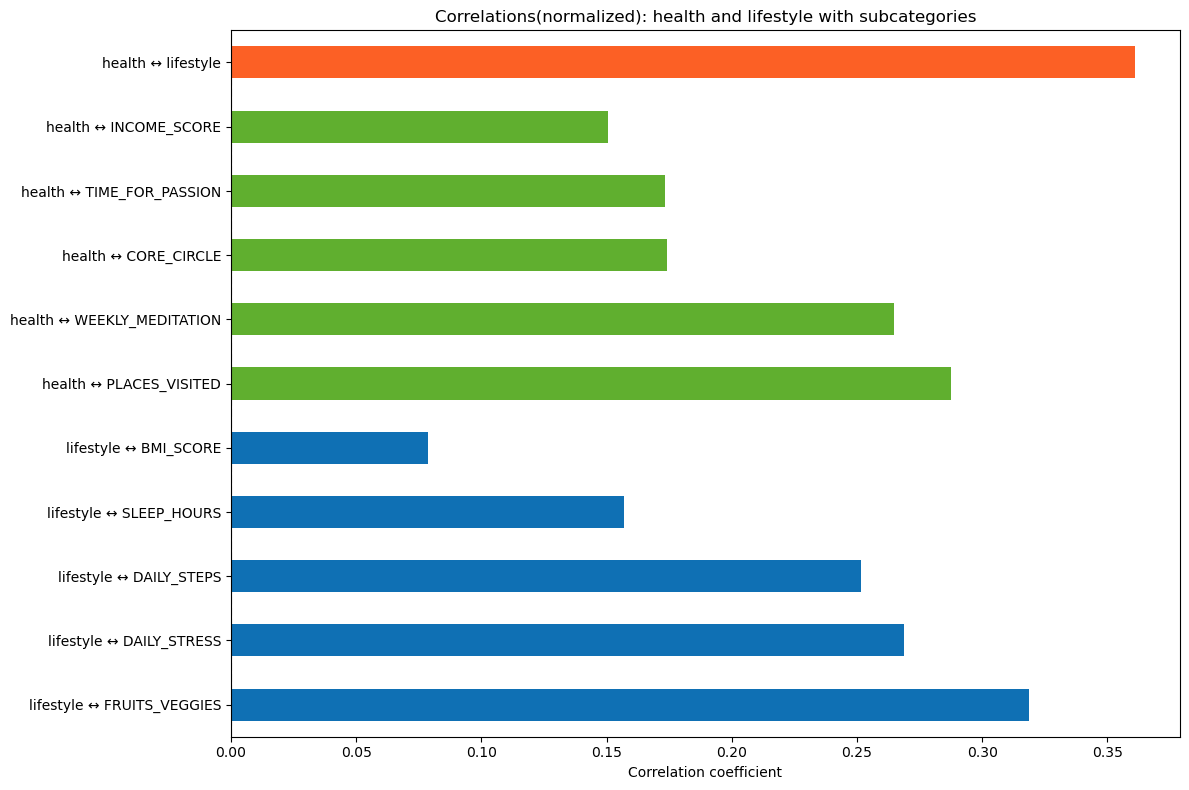

In [57]:
# add health and lifestyle to the scaled_df
scaled_df["health"] = csv_data["health"]
scaled_df["lifestyle"] = csv_data["lifestyle"]

health_subcategories = [
    "FRUITS_VEGGIES",
    "DAILY_STRESS",
    "DAILY_STEPS",
    "SLEEP_HOURS",
    "BMI_SCORE"
]

lifestyle_subcategories = [
    "PLACES_VISITED",
    "CORE_CIRCLE",
    "TIME_FOR_PASSION",
    "WEEKLY_MEDITATION",
    #"WORK_LIFE_BALANCE_SCORE",
    "INCOME_SCORE"
]


# calculate correlations between health and lifestyle subcategories
corr_health_to_lifestyle = {
    f"health ↔ {col}": scaled_df["health"].corr(scaled_df[col]) for col in lifestyle_subcategories
}
#calculate correlations between lifestyle and health subcategories
corr_lifestyle_to_health = {
    f"lifestyle ↔ {col}": scaled_df["lifestyle"].corr(scaled_df[col]) for col in health_subcategories
}

# health ↔ lifestyle correlation
general_corr = {"health ↔ lifestyle": scaled_df["health"].corr(scaled_df["lifestyle"])}

# sort every group
sorted_health_to_lifestyle = dict(sorted(corr_health_to_lifestyle.items(), key=lambda x: x[1]))
sorted_lifestyle_to_health = dict(sorted(corr_lifestyle_to_health.items(), key=lambda x: x[1]))

# put in the right order
final_corrs = {**general_corr, **sorted_health_to_lifestyle, **sorted_lifestyle_to_health}

# set colours
colors = []
for key in final_corrs.keys():
    if key == "health ↔ lifestyle":
        colors.append("#fc6025")  
    elif key.startswith("health ↔"):
        colors.append("#60af2f")  
    else:
        colors.append("#0f70b4")  

# plotting
corr_series = pd.Series(final_corrs)

plt.figure(figsize=(12, 8))
corr_series.plot(kind="barh", color=colors)

plt.title("Correlations(normalized): health and lifestyle with subcategories")
plt.xlabel("Correlation coefficient")
plt.axvline(0, color='gray', linestyle='--')
plt.gca().invert_yaxis()  # so that health ↔ lifestyle is at the top
plt.tight_layout()
plt.show()


### **Colour palette**
The most used ones: 
1. orange: "#fc6025"
2. brown: "#46361d"
3. green: "#60af2f"
4. blue: "#0f70b4"
 
Orange
1. "#fc6025"
2. "#fc6023" 
3. "#fb6125" 

Green
1. "#60af2f" 
2. "#a6df81" 
3. "#5fb02f" 

Blue
1. "#92e4f0" 
2. "#0f70b4"
3. "#91e5f0" 
4. "#edffff" 


### **Clustering**

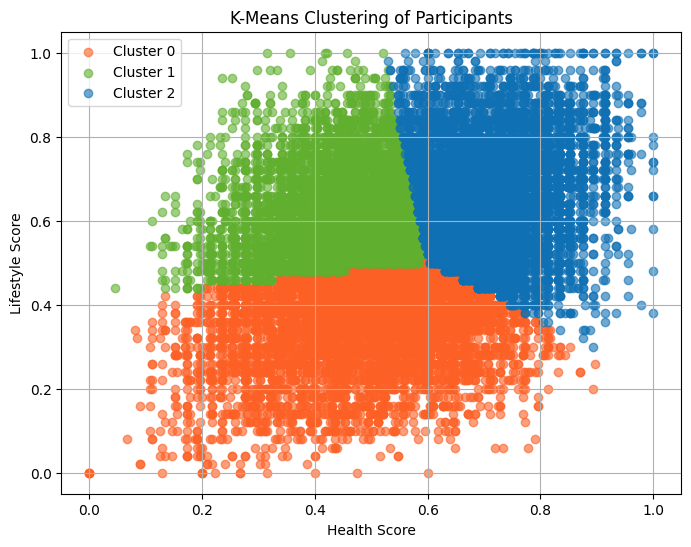


Cluster centers (Health, Lifestyle):
Cluster 0: Health = 0.48, Lifestyle = 0.34
Cluster 1: Health = 0.44, Lifestyle = 0.63
Cluster 2: Health = 0.72, Lifestyle = 0.67


In [26]:

import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # number of logical cores
from sklearn.cluster import KMeans

# Step 1: Select the features for clustering
X = scaled_df[["health", "lifestyle"]]

# Step 2: Apply KMeans
k = 3  # You can experiment with different values
kmeans = KMeans(n_clusters=k, random_state=42)
csv_data["cluster"] = kmeans.fit_predict(X)

# Step 3: Visualize the clusters
plt.figure(figsize=(8, 6))
colors = ['#fc6025', '#60af2f', '#0f70b4']
for i in range(k):
    cluster_data = csv_data[csv_data["cluster"] == i]
    plt.scatter(cluster_data["health"], cluster_data["lifestyle"], 
                color=colors[i], label=f"Cluster {i}", alpha=0.6)

plt.xlabel("Health Score")
plt.ylabel("Lifestyle Score")
plt.title("K-Means Clustering of Participants")
plt.legend()
plt.grid(True)
plt.show()

# Step 4: Print the cluster centers for final check
print("\nCluster centers (Health, Lifestyle):")
for i, center in enumerate(kmeans.cluster_centers_):
    print(f"Cluster {i}: Health = {center[0]:.2f}, Lifestyle = {center[1]:.2f}")

### **Confirming with Elbow method**

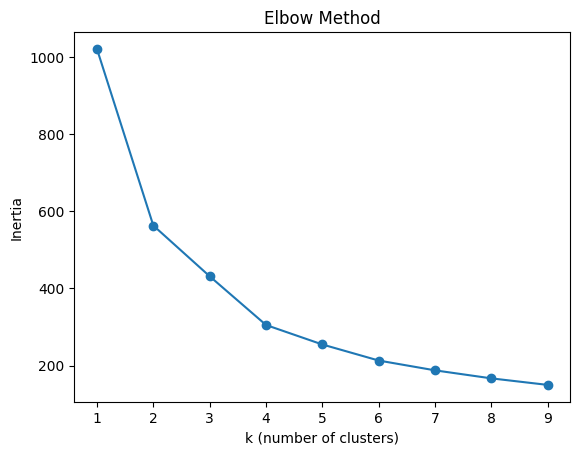

In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 10)
for k in K:
    model = KMeans(n_clusters=k, random_state=0).fit(scaled_df[["health", "lifestyle"]])
    inertia.append(model.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel("k (number of clusters)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()